# Working with Dates & Times in Pandas

In [52]:
# Import libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Example timestamp
my_timestamp = pd.Timestamp(datetime(2021,12,15))

In [3]:
# Some attributes of a pandas timestamp
print(my_timestamp.year)
print(my_timestamp.month)
print(my_timestamp.dayofweek)

2021
12
2


In [4]:
# Time periods and frquency - Creating a time series
# Frequesncy options inclide: Hour H, Day D, Week W, Month M, Quarter Q and Year Y
my_timeseries = pd.date_range(start='2021-7-1', periods=6, freq='M')
my_timeseries

DatetimeIndex(['2021-07-31', '2021-08-31', '2021-09-30', '2021-10-31',
               '2021-11-30', '2021-12-31'],
              dtype='datetime64[ns]', freq='M')

In [5]:
# Create the range of dates here
seven_days = pd.date_range(start='2022-1-1', periods=7)

# Iterate over the dates and print the number and name of the weekday
for day in seven_days:
    print(day.day_of_week)


5
6
0
1
2
3
4


# Time Series Data

In [7]:
# Read in the Gas_And_Diesel_Retail_Price.csv file as a DataFrame
# name this DataFrame gasDieselPrices
# Data source is here: https://www.kaggle.com/mruanova/us-gasoline-and-diesel-retail-prices-19952021
gasDieselPrices = pd.read_csv('Gas_And_Diesel_Retail_Price.csv')
gasDieselPrices.head()

,Date,A1,A2,A3,R1,R2,R3,M1,M2,M3,P1,P2,P3,D1
0,01/02/1995,1.127,1.104,1.231,1.079,1.063,1.167,1.170,1.159,1.298,1.272,1.250,1.386,1.104
1,01/09/1995,1.134,1.111,1.232,1.086,1.070,1.169,1.177,1.164,1.300,1.279,1.256,1.387,1.102
2,01/16/1995,1.126,1.102,1.231,1.078,1.062,1.169,1.168,1.155,1.299,1.271,1.249,1.385,1.100
3,01/23/1995,1.132,1.110,1.226,1.083,1.068,1.165,1.177,1.165,1.296,1.277,1.256,1.378,1.095
4,01/30/1995,1.131,1.109,1.221,1.083,1.068,1.162,1.176,1.163,1.291,1.275,1.255,1.370,1.090


In [8]:
gasDieselPrices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1361 entries, 0 to 1360
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1361 non-null   object 
 1   A1      1361 non-null   float64
 2   A2      1361 non-null   float64
 3   A3      1361 non-null   float64
 4   R1      1361 non-null   float64
 5   R2      1361 non-null   float64
 6   R3      1361 non-null   float64
 7   M1      1361 non-null   float64
 8   M2      1361 non-null   float64
 9   M3      1361 non-null   float64
 10  P1      1361 non-null   float64
 11  P2      1361 non-null   float64
 12  P3      1361 non-null   float64
 13  D1      1361 non-null   float64
dtypes: float64(13), object(1)
memory usage: 149.0+ KB


In [9]:
# Convert the date column to datetime64
gasDieselPrices.Date = pd.to_datetime(gasDieselPrices.Date)

# Set date column as index
gasDieselPrices.set_index('Date', inplace=True)

# Inspect data 
print(gasDieselPrices.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1361 entries, 1995-01-02 to 2021-01-25
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      1361 non-null   float64
 1   A2      1361 non-null   float64
 2   A3      1361 non-null   float64
 3   R1      1361 non-null   float64
 4   R2      1361 non-null   float64
 5   R3      1361 non-null   float64
 6   M1      1361 non-null   float64
 7   M2      1361 non-null   float64
 8   M3      1361 non-null   float64
 9   P1      1361 non-null   float64
 10  P2      1361 non-null   float64
 11  P3      1361 non-null   float64
 12  D1      1361 non-null   float64
dtypes: float64(13)
memory usage: 148.9 KB
None


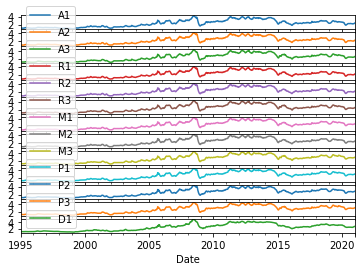

In [10]:
# Plot data
gasDieselPrices.plot(subplots=True)
plt.show()

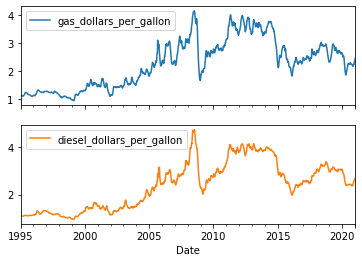

In [11]:
# Let's Clean this up

# The column names are not very descriptive as they are
# You are only interested in: 
# Dates, Weekly U.S. All Grades All Formulations Retail Gasoline Prices, Weekly U.S. No 2 Diesel Retail Prices
# This corresponds to the columns Date, A1 and D1
# Make the DataFrame gasDieselPrices only contain these three fields
gasDieselPrices = gasDieselPrices[["A1", "D1"]]
gasDieselPrices = gasDieselPrices.rename(columns={"A1": "gas_dollars_per_gallon", "D1": "diesel_dollars_per_gallon"})

# Plot data
gasDieselPrices.plot(subplots=True)
plt.show()

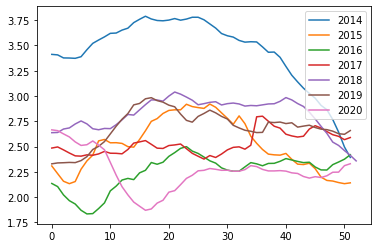

In [12]:
# Create dataframe prices here
prices = pd.DataFrame()

# Select data for each year and concatenate with prices here 
for year in ['2014', '2015', '2016', 
'2017', '2018','2019', '2020']:
    price_per_year = gasDieselPrices.loc[year, ['gas_dollars_per_gallon']].reset_index(drop=True)
    price_per_year.rename(columns={'gas_dollars_per_gallon': year}, inplace=True)
    prices = pd.concat([prices, price_per_year], axis=1)

# Plot prices
prices.plot()
plt.show()

In [18]:
gasDieselPrices = pd.read_csv('Gas_And_Diesel_Retail_Price.csv')
# Convert the date column to datetime64
gasDieselPrices.Date = pd.to_datetime(gasDieselPrices.Date)

gasDieselPrices = gasDieselPrices[["Date", "A1"]]
gasDieselPrices = gasDieselPrices.rename(columns={"A1": "gas_dollars_per_gallon"})


gasDieselPrices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1361 entries, 0 to 1360
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    1361 non-null   datetime64[ns]
 1   gas_dollars_per_gallon  1361 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 21.4 KB


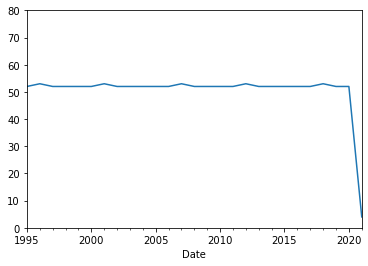

In [24]:
gasDieselPrices.resample('Y', on = "Date").size().plot(ylim = [0, 80])

plt.show()

# Reshaping and Reformatting Data Structures

In [25]:
df = pd.DataFrame({'Name': ['Felix', 'Buddy', 'Mr. Whiskers'],
      'Animal_Type': ['Cat', 'Dog', 'Cat'],
      'Age': [3, 5, 4]})
df

,Name,Animal_Type,Age
0,Felix,Cat,3
1,Buddy,Dog,5
2,Mr. Whiskers,Cat,4


In [27]:
df_reshaped = df.pivot('Name', 'Animal_Type', 'Age')
df_reshaped

Animal_Type,Cat,Dog
Name,,
Buddy,NaN,5.0
Felix,3.0,NaN
Mr. Whiskers,4.0,NaN


In [28]:
# Melt takes data froma wide format to a long format
df_melt = pd.melt(df, id_vars =['Name'], value_vars =['Animal_Type', 'Age'])
df_melt

,Name,variable,value
0,Felix,Animal_Type,Cat
1,Buddy,Animal_Type,Dog
2,Mr. Whiskers,Animal_Type,Cat
3,Felix,Age,3
4,Buddy,Age,5
5,Mr. Whiskers,Age,4


# Data Viz with Seaborn

In [29]:
import seaborn as sns

## <i> Looking at data distributions visually

In [32]:
# Source: https://seaborn.pydata.org/tutorial/function_overview.html
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

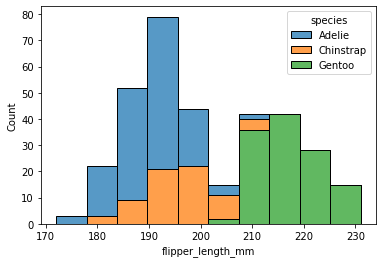

In [33]:
sns.histplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Density'>

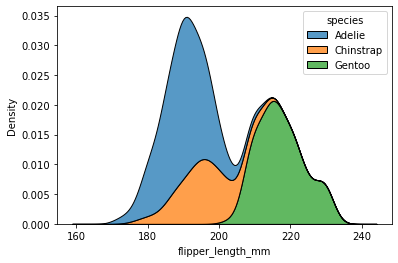

In [31]:
sns.kdeplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

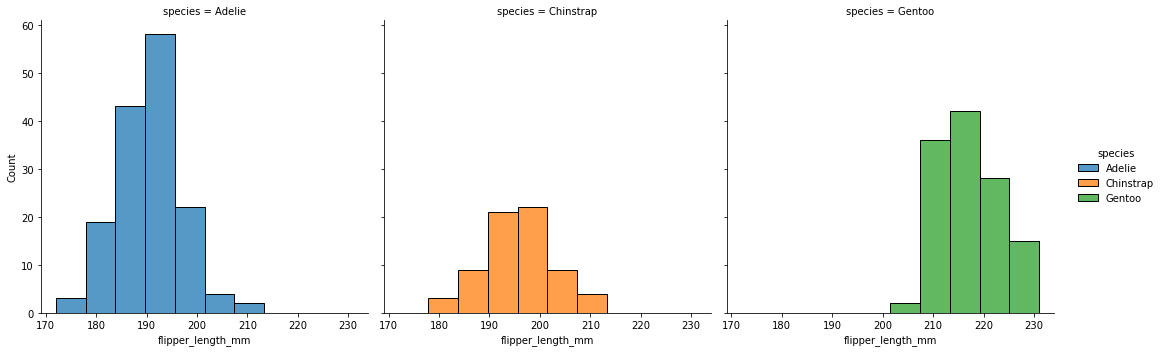

In [34]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", col="species")

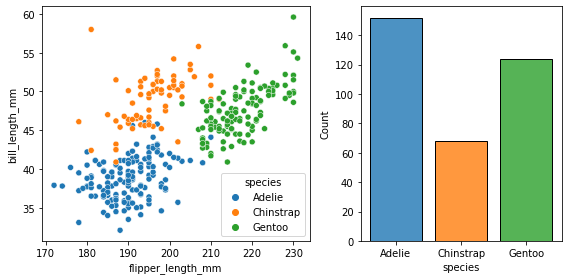

In [35]:
f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.scatterplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species", ax=axs[0])
sns.histplot(data=penguins, x="species", hue="species", shrink=.8, alpha=.8, legend=False, ax=axs[1])
f.tight_layout()

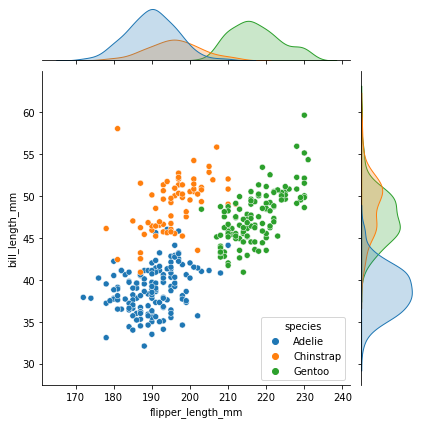

In [36]:
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")

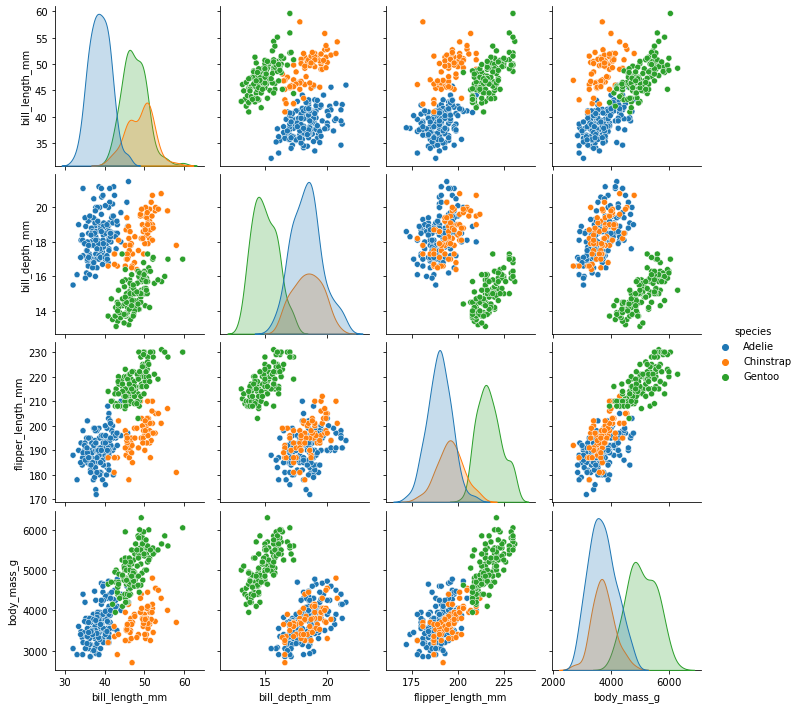

In [37]:
sns.pairplot(data=penguins, hue="species")

## <i> Looking at statistical relationships visually

In [39]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


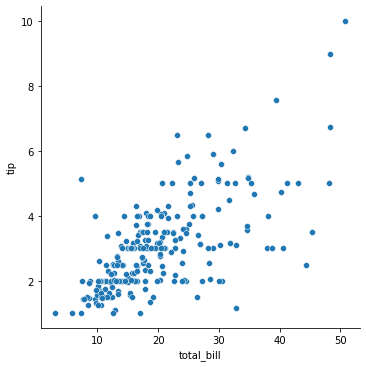

In [40]:
sns.relplot(x="total_bill", y="tip", data=tips);

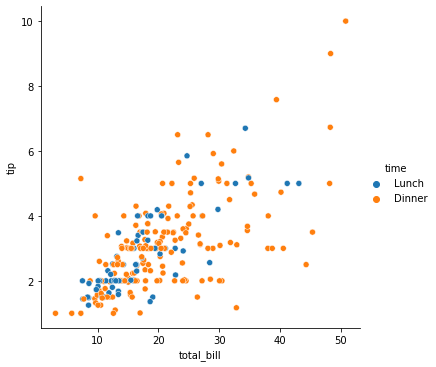

In [41]:
sns.relplot(x="total_bill", y="tip", hue="time", data=tips);

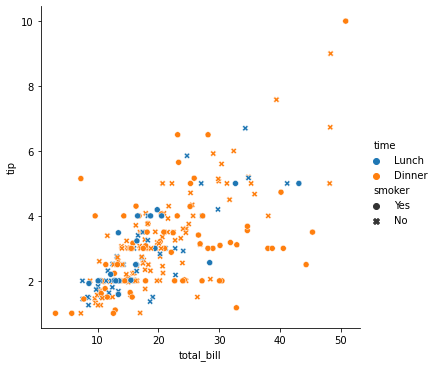

In [55]:
sns.relplot(x="total_bill", y="tip", hue="time", style="smoker",
            data=tips);

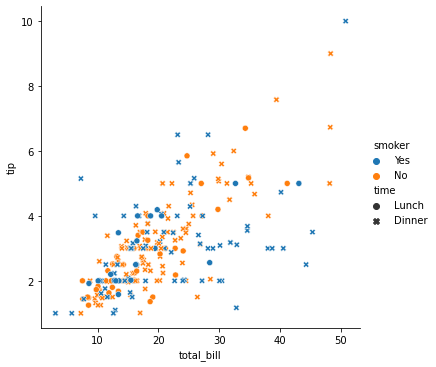

In [43]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips);

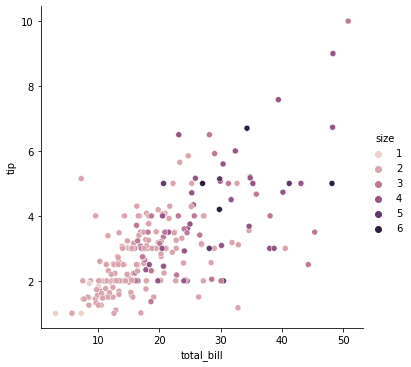

In [44]:
sns.relplot(x="total_bill", y="tip", hue="size", data=tips);

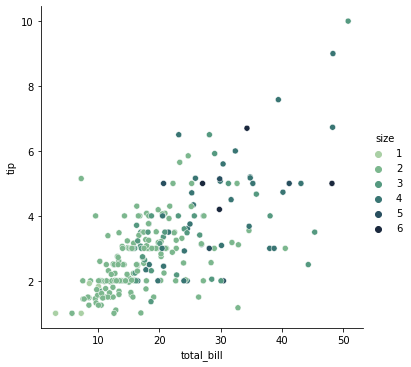

In [48]:
sns.relplot(x="total_bill", y="tip", hue="size", palette="ch:r=-.5,l=.75", data=tips);

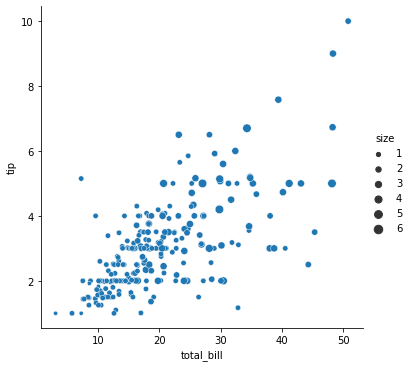

In [47]:
sns.relplot(x="total_bill", y="tip", size="size", data=tips);

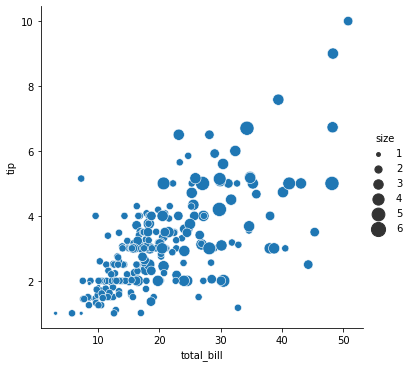

In [49]:
sns.relplot(x="total_bill", y="tip", size="size", sizes=(15, 200), data=tips);

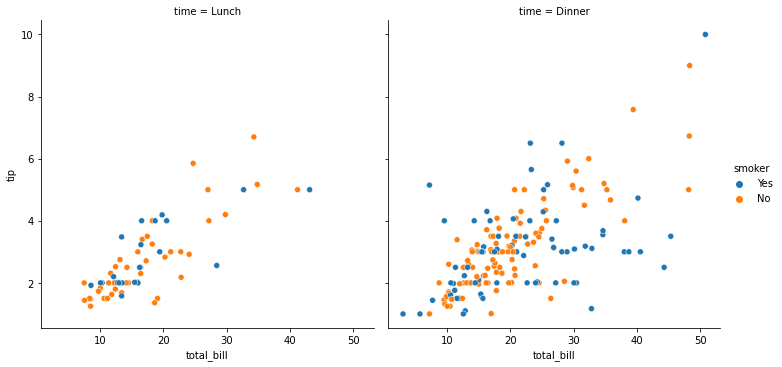

In [64]:
sns.relplot(x="total_bill", y="tip", hue="smoker",
            col="time", data=tips);

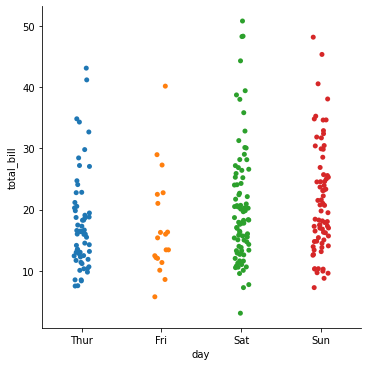

In [67]:
tips = sns.load_dataset("tips")
sns.catplot(x="day", y="total_bill", data=tips)

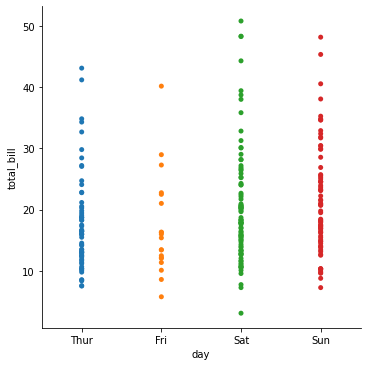

In [68]:
sns.catplot(x="day", y="total_bill", jitter=False, data=tips)

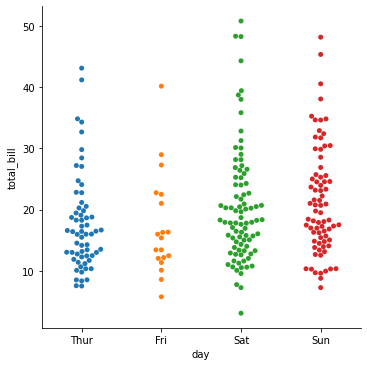

In [69]:
sns.catplot(x="day", y="total_bill", kind="swarm", data=tips)

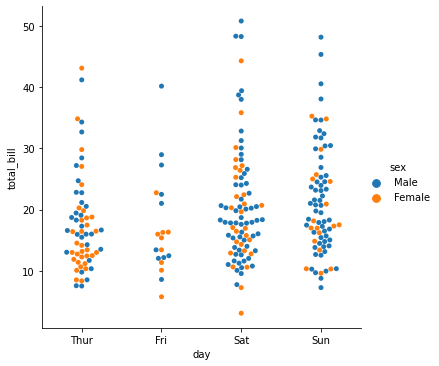

In [70]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=tips)

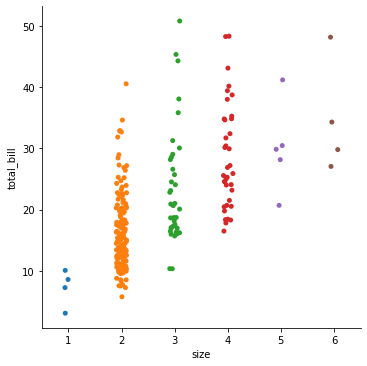

In [71]:
sns.catplot(x="size", y="total_bill", data=tips)

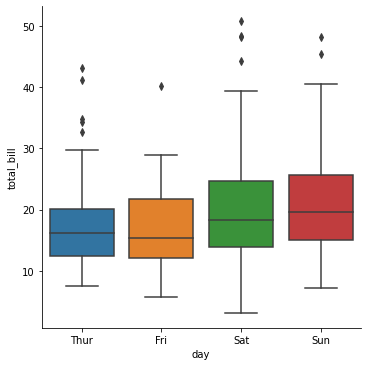

In [72]:
sns.catplot(x="day", y="total_bill", kind="box", data=tips)

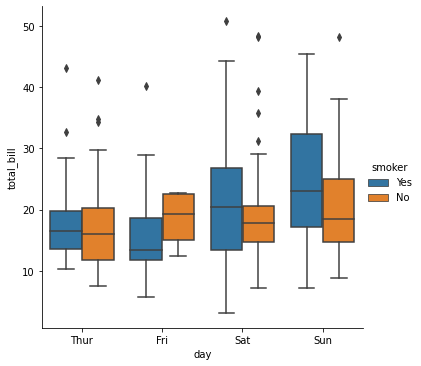

In [73]:
sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips)

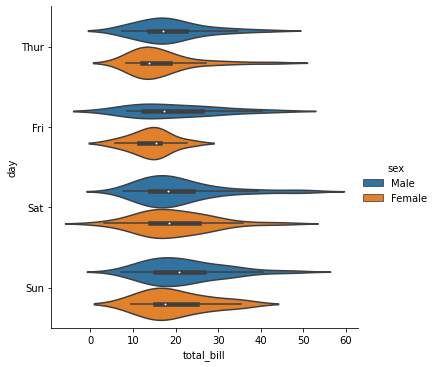

In [74]:
sns.catplot(x="total_bill", y="day", hue="sex",
            kind="violin", data=tips)

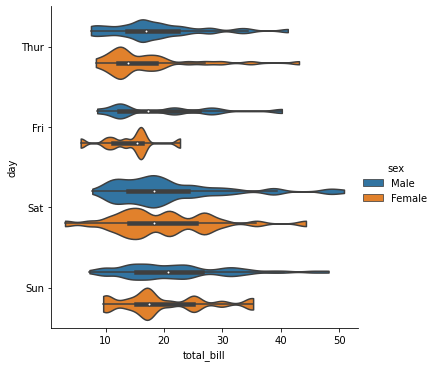

In [75]:
sns.catplot(x="total_bill", y="day", hue="sex",
            kind="violin", bw=.15, cut=0,
            data=tips)

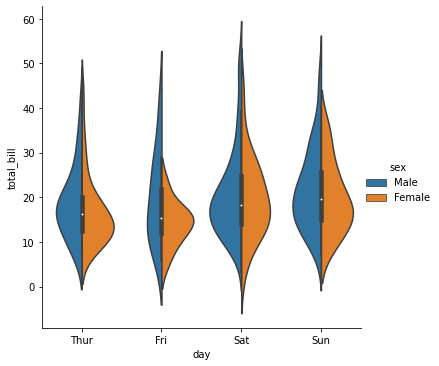

In [76]:
sns.catplot(x="day", y="total_bill", hue="sex",
            kind="violin", split=True, data=tips)

## <i> Continuous data visualized with line plots

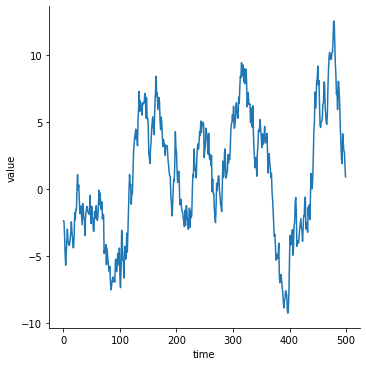

In [56]:
df = pd.DataFrame(dict(time=np.arange(500),
                       value=np.random.randn(500).cumsum()))
sns.relplot(x="time", y="value", kind="line", data=df)


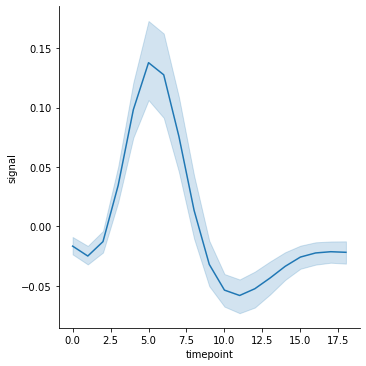

In [57]:
# Adding a 95% Confidence interval to a line plot
# Confidence interval: a range of values so defined that there is a specified probability that 
# the value of a parameter lies within it.
fmri = sns.load_dataset("fmri")
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri);

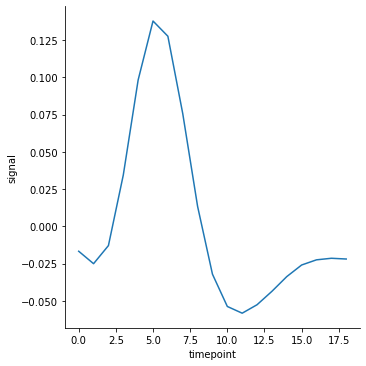

In [58]:
# Do not display connfidence interval
sns.relplot(x="timepoint", y="signal", ci=None, kind="line", data=fmri);

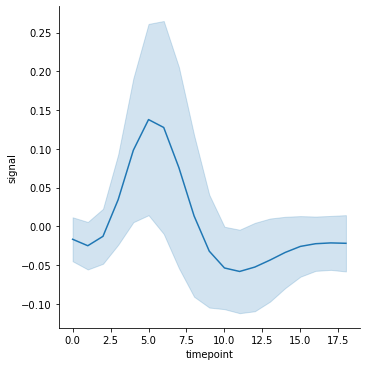

In [59]:
# Show stadard deviation
# Standard Deviation:  a measure of the amount of variation or dispersion of a set of values. 
# A low standard deviation indicates that the values tend to be close to the mean of the set, 
# while a high standard deviation indicates that the values are spread out over a wider range.
sns.relplot(x="timepoint", y="signal", kind="line", ci="sd", data=fmri);

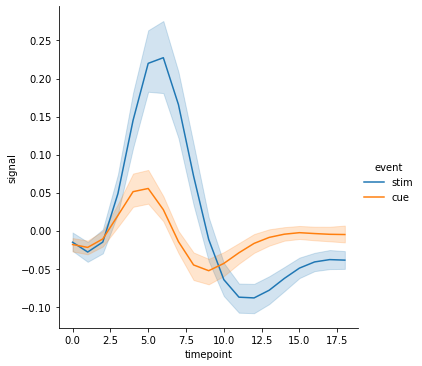

In [60]:
sns.relplot(x="timepoint", y="signal", hue="event", kind="line", data=fmri);

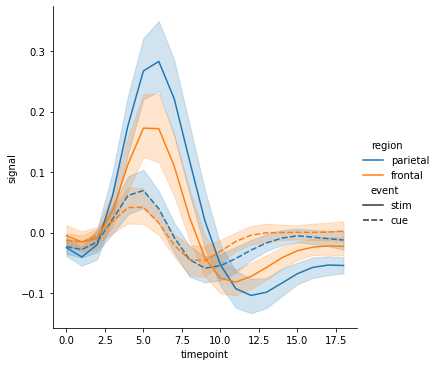

In [61]:
sns.relplot(x="timepoint", y="signal", hue="region", style="event",
            kind="line", data=fmri);

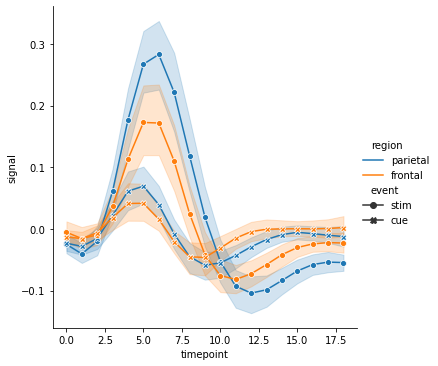

In [62]:
sns.relplot(x="timepoint", y="signal", hue="region", style="event",
            dashes=False, markers=True, kind="line", data=fmri);

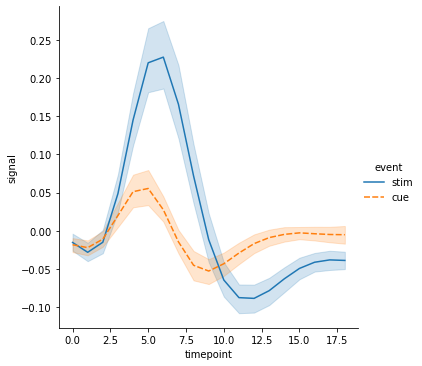

In [63]:
sns.relplot(x="timepoint", y="signal", hue="event", style="event",
            kind="line", data=fmri);

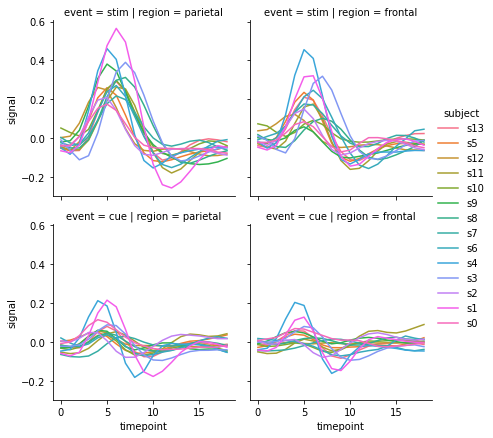

In [65]:
sns.relplot(x="timepoint", y="signal", hue="subject",
            col="region", row="event", height=3,
            kind="line", estimator=None, data=fmri);

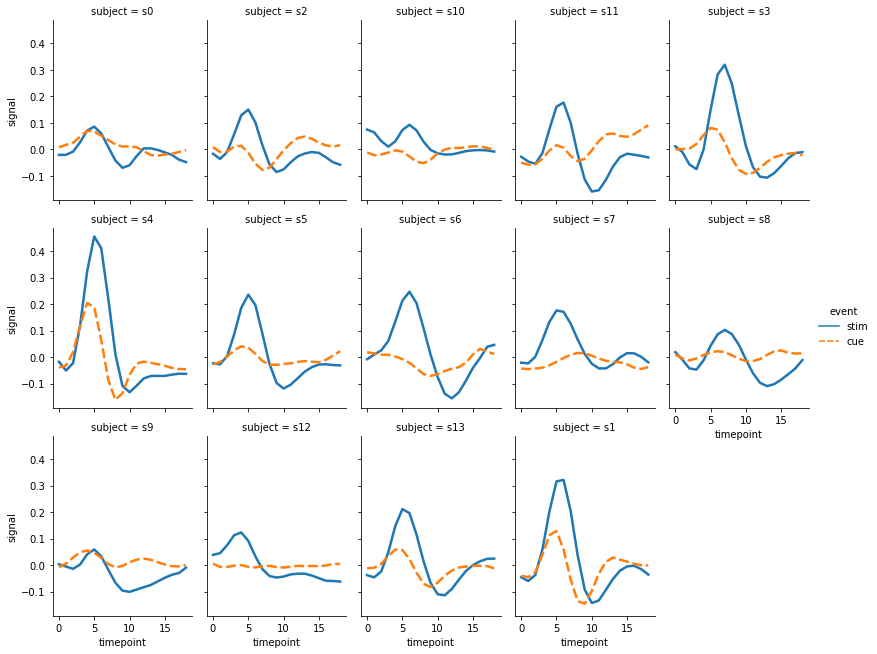

In [66]:
sns.relplot(x="timepoint", y="signal", hue="event", style="event",
            col="subject", col_wrap=5,
            height=3, aspect=.75, linewidth=2.5,
            kind="line", data=fmri.query("region == 'frontal'"));